# The Climate Impact of the 1991 Mount Pinatubo Eruption
Time Range: 1985-1995

Event Description:

The June 15, 1991 eruption of **Mount Pinatubo** in the Philippines was one of the largest volcanic eruptions of the 20th century. It blasted about **15–17 million tons of sulfur dioxide** (SO₂) into the stratosphere, which formed a global haze of sulfate aerosols. These aerosols reflected sunlight and cooled the Earth’s surface. Following Pinatubo, **global average temperatures dropped by about 0.5°C** for a year or two, temporarily masking the ongoing global warming. In this project, we will analyze global temperature data around the early 1990s to observe the volcanic cooling effect and place it in context.

Datasources:

NASA GISTEMP: https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt

NASA GISS: https://data.giss.nasa.gov/modelforce/strataer/tau.line_2012.12.txt

Volcanic Eruption Ref.: https://earthobservatory.nasa.gov/features/Volcano

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
# https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
uploaded = files.upload()

#url = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'

# Read the CSV file while skipping the first row (header formatting note)
# raw_data = pd.read_csv(url, skiprows=1)



# Get the filename
filename = list(uploaded.keys())[0]

# Read into DataFrame
df = pd.read_csv(filename, skiprows=1)

# Filter columns to contain just year and months
df_filtered = df.iloc[:, :13]

# Melt the dataframe to convert months from columns to rows
df_melted = df_filtered.melt(
    id_vars=['Year'],
    var_name='Month',
    value_name='Temperature'
)

# Create a date string and convert to datetime
df_melted['Date'] = pd.to_datetime(
    df_melted['Year'].astype(str) + '-' + df_melted['Month'] + '-01'
)

# Convert Temperature to numeric, replacing '***' and other non-numeric values with NaN
df_melted['Temperature'] = pd.to_numeric(df_melted['Temperature'], errors='coerce')

# Set the datetime as index and drop the separate Year/Month columns
df_monthly = df_melted.set_index('Date')[['Temperature']]

# Display head
df_monthly.head()

Saving GLB.Ts+dSST.csv to GLB.Ts+dSST.csv


,Temperature
Date,
1880-01-01,-0.19
1881-01-01,-0.20
1882-01-01,0.16
1883-01-01,-0.29
1884-01-01,-0.13


In [ ]:
# Filter the dataframe to only include 1985-1995
df_monthly_filtered = df_monthly[(df_monthly.index.year >= 1985) & (df_monthly.index.year <= 1995)]

print(f"Years in dataset: {df_monthly_filtered}")
print(f"Number of years: {len(df_monthly_filtered)}")

Years in dataset:             Temperature
Date                   
1985-01-01         0.22
1986-01-01         0.26
1987-01-01         0.32
1988-01-01         0.57
1989-01-01         0.12
...                 ...
1991-12-01         0.31
1992-12-01         0.21
1993-12-01         0.18
1994-12-01         0.38
1995-12-01         0.26

[132 rows x 1 columns]
Number of years: 132


Date
1985-12-31    0.118542
1986-12-31    0.170278
1987-12-31    0.228681
1988-12-31    0.390000
1989-12-31    0.290556
1990-12-31    0.389375
1991-12-31    0.421250
1992-12-31    0.331111
1993-12-31    0.211875
1994-12-31    0.232569
1995-12-31    0.423125
Freq: YE-DEC, Name: RunningMean12, dtype: float64


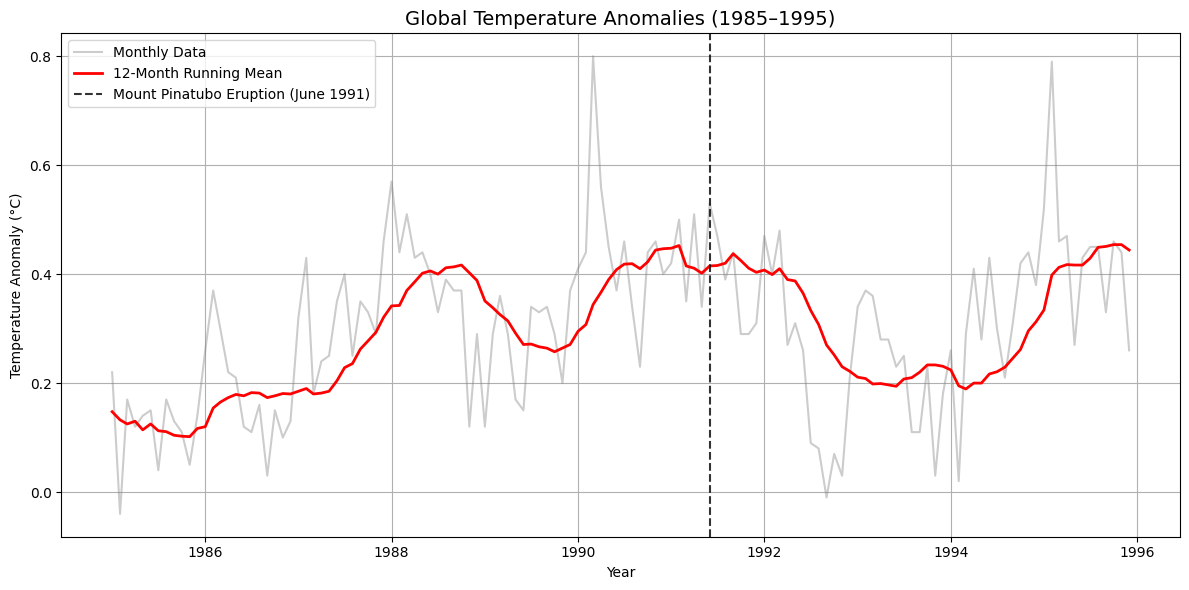

In [ ]:
import matplotlib.pyplot as plt

# Sort and set date index
df_melted_sorted = df_melted.sort_values('Date').set_index('Date')

# Ensure temperature is numeric (in case of re-runs)
df_melted_sorted['Temperature'] = pd.to_numeric(df_melted_sorted['Temperature'], errors='coerce')

# 12-month running mean — now over actual months
df_melted_sorted['RunningMean12'] = df_melted_sorted['Temperature'].rolling(window=12).mean()

# Optional: filter for 1985–1995
df_smoothed_filtered = df_melted_sorted.loc['1985':'1995']

# Resample to annual frequency after computing 12-month running mean
annual_running_mean = df_melted_sorted['RunningMean12'].resample('YE').mean()

print(annual_running_mean.loc['1985':'1995'])

# Plotting range: 1985 to 1995
start, end = '1985', '1995'

# Filter both raw and smoothed data for this range
raw_1985_1995 = df_melted_sorted['Temperature'].loc[start:end]
smooth_1985_1995 = df_melted_sorted['RunningMean12'].loc[start:end]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot raw monthly data as faint gray points/line
plt.plot(raw_1985_1995.index, raw_1985_1995.values, color='gray', alpha=0.4, label='Monthly Data')

# Plot 12-month running mean as bold red line
plt.plot(smooth_1985_1995.index, smooth_1985_1995.values, color='red', linewidth=2.0, label='12-Month Running Mean')

# Add vertical line for Mount Pinatubo eruption (June 1991)
pinatubo_date = pd.to_datetime('1991-06-01')
plt.axvline(x=pinatubo_date, color='black', linestyle='--', linewidth=1.5, alpha=0.8, label='Mount Pinatubo Eruption (June 1991)')

# Labels and title
plt.title('Global Temperature Anomalies (1985–1995)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Date
1985-12-31    0.118542
1986-12-31    0.170278
1987-12-31    0.228681
1988-12-31    0.390000
1989-12-31    0.290556
1990-12-31    0.389375
1991-12-31    0.421250
1992-12-31    0.331111
1993-12-31    0.211875
1994-12-31    0.232569
1995-12-31    0.423125
Freq: YE-DEC, Name: RunningMean12, dtype: float64

Pre-eruption trend (1987-1991): 0.041°C/year (R²=0.425)


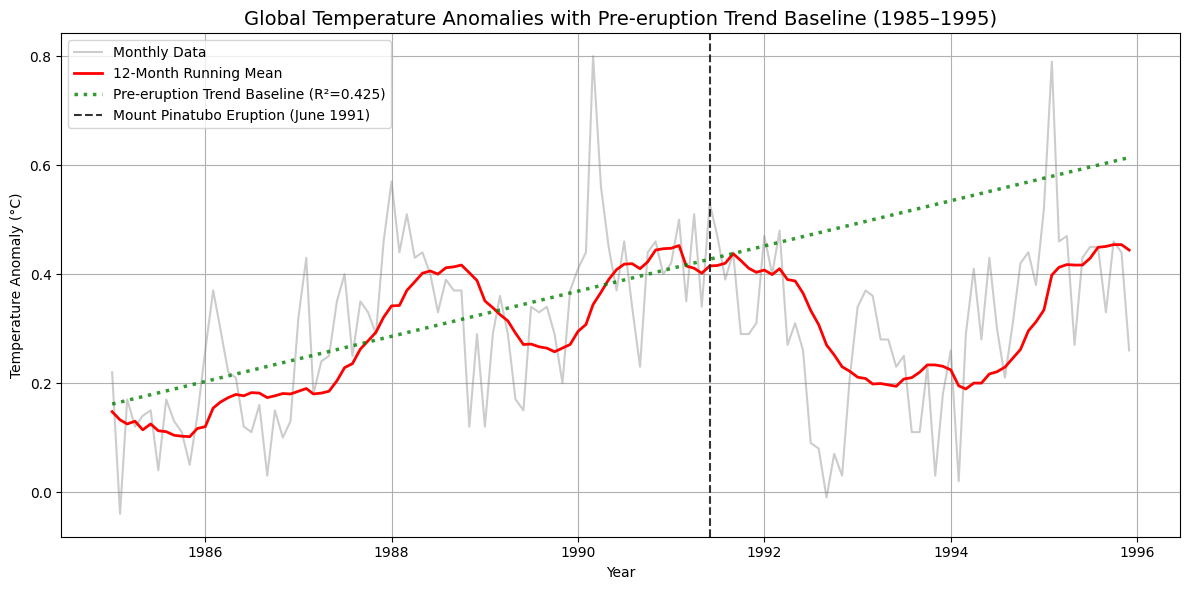

In [ ]:
# Comparative baseline

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Sort and set date index
df_melted_sorted = df_melted.sort_values('Date').set_index('Date')

# Ensure temperature is numeric (in case of re-runs)
df_melted_sorted['Temperature'] = pd.to_numeric(df_melted_sorted['Temperature'], errors='coerce')

# 12-month running mean — now over actual months
df_melted_sorted['RunningMean12'] = df_melted_sorted['Temperature'].rolling(window=12).mean()

# Optional: filter for 1985–1995
df_smoothed_filtered = df_melted_sorted.loc['1985':'1995']

# Resample to annual frequency after computing 12-month running mean
annual_running_mean = df_melted_sorted['RunningMean12'].resample('YE').mean()

print(annual_running_mean.loc['1985':'1995'])

# === ADD TREND EXTRAPOLATION CALCULATION HERE ===
# Calculate pre-eruption trend for baseline
trend_period_start = pd.to_datetime('1987-01-01')
trend_period_end = pd.to_datetime('1991-05-31')
trend_data = df_melted_sorted['RunningMean12'].loc[trend_period_start:trend_period_end].dropna()

# Convert dates to numerical values for regression
trend_dates_numeric = [(d - trend_data.index[0]).days for d in trend_data.index]
slope, intercept, r_value, p_value, std_err = stats.linregress(trend_dates_numeric, trend_data.values)

# Create extended trend line for the 1985-1995 period
trend_start = pd.to_datetime('1985-01-01')
trend_end = pd.to_datetime('1995-12-31')
trend_dates_extended = pd.date_range(trend_start, trend_end, freq='MS')
trend_dates_extended_numeric = [(d - trend_data.index[0]).days for d in trend_dates_extended]
trend_extended_temps = slope * np.array(trend_dates_extended_numeric) + intercept
trend_extended_series = pd.Series(trend_extended_temps, index=trend_dates_extended)

# Plotting range: 1985 to 1995
start, end = '1985', '1995'

# Filter both raw and smoothed data for this range
raw_1985_1995 = df_melted_sorted['Temperature'].loc[start:end]
smooth_1985_1995 = df_melted_sorted['RunningMean12'].loc[start:end]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot raw monthly data as faint gray points/line
plt.plot(raw_1985_1995.index, raw_1985_1995.values, color='gray', alpha=0.4, label='Monthly Data')

# Plot 12-month running mean as bold red line
plt.plot(smooth_1985_1995.index, smooth_1985_1995.values, color='red', linewidth=2.0, label='12-Month Running Mean')

# === ADD TREND BASELINE TO THE PLOT ===
# Plot trend extrapolation baseline
plt.plot(trend_extended_series.index, trend_extended_series.values, 'g:', linewidth=2.5, alpha=0.8,
         label=f'Pre-eruption Trend Baseline (R²={r_value**2:.3f})')

# Add vertical line for Mount Pinatubo eruption (June 1991)
pinatubo_date = pd.to_datetime('1991-06-01')
plt.axvline(x=pinatubo_date, color='black', linestyle='--', linewidth=1.5, alpha=0.8, label='Mount Pinatubo Eruption (June 1991)')

# Labels and title
plt.title('Global Temperature Anomalies with Pre-eruption Trend Baseline (1985–1995)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# === ADD SUMMARY STATISTICS ===
print(f"\nPre-eruption trend (1987-1991): {slope*365:.3f}°C/year (R²={r_value**2:.3f})")

# Show the plot
plt.show()

# Plot Summary:

- A strong El Nino event caused the global temperature spike in 1990

- Mount Pinatubo erupted in 1991, causing global temperature to cool down

- Gray line represents raw monthly data

- Red line represents smoothed data, suggesting overall upward trend

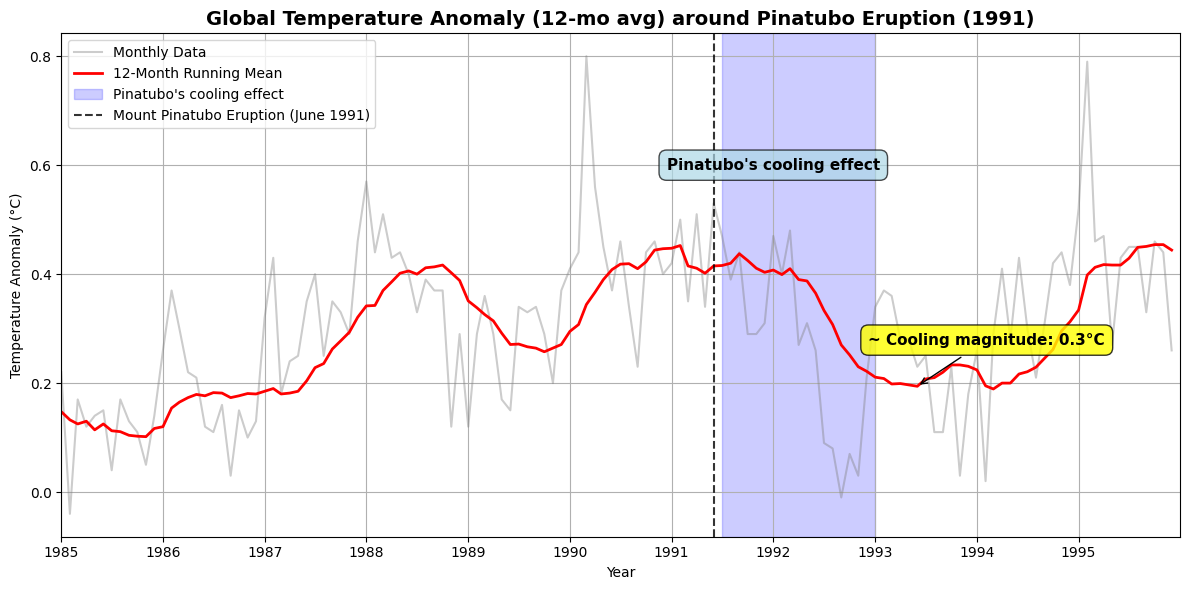

In [ ]:
# Plotting range: 1985 to 1995
start, end = '1985-01-01', '1995-12-31'

# Filter both raw and smoothed data for this range
raw_1985_1995 = df_melted_sorted['Temperature'].loc[start:end]
smooth_1985_1995 = df_melted_sorted['RunningMean12'].loc[start:end]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot raw monthly data as faint gray points/line
plt.plot(raw_1985_1995.index, raw_1985_1995.values, color='gray', alpha=0.4, label='Monthly Data')

# Plot 12-month running mean as bold red line
plt.plot(smooth_1985_1995.index, smooth_1985_1995.values, color='red', linewidth=2.0, label='12-Month Running Mean')

# Define the cooling period (from late 1991 through late 1992/early 1993)
cooling_start = pd.to_datetime('1991-07-01')  # Start a month after eruption
cooling_end = pd.to_datetime('1993-01-01')    # End when recovery becomes evident

# Add shaded area for Pinatubo's cooling effect
plt.axvspan(cooling_start, cooling_end, alpha=0.2, color='blue',
           label="Pinatubo's cooling effect")

# Add text label for the shaded area
plt.text(pd.to_datetime('1992-01-01'), 0.6, "Pinatubo's cooling effect",
         fontsize=11, ha='center', va='center', weight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7))

# Add vertical line for Mount Pinatubo eruption (June 1991)
pinatubo_date = pd.to_datetime('1991-06-01')
plt.axvline(x=pinatubo_date, color='black', linestyle='--', linewidth=1.5, alpha=0.8,
           label='Mount Pinatubo Eruption (June 1991)')

# Set x-axis limits explicitly to show full 1985-1995 range
plt.xlim(pd.to_datetime('1985-01-01'), pd.to_datetime('1995-12-31'))

# Find pre-eruption peak and post-eruption minimum for cooling magnitude annotation
pre_eruption = smooth_1985_1995.loc['1990':'1991-06']
pre_peak_temp = pre_eruption.max()
post_eruption = smooth_1985_1995.loc['1991-07':'1993']
post_min_temp = post_eruption.min()
post_min_date = post_eruption.idxmin()

# Calculate and annotate cooling magnitude
cooling_magnitude = pre_peak_temp - post_min_temp
plt.annotate(f"~ Cooling magnitude: {cooling_magnitude:.1f}°C",
            xy=(post_min_date, post_min_temp),
            xytext=(50, 30), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='black'),
            fontsize=11, ha='center', weight='bold')

# Labels and title
plt.title('Global Temperature Anomaly (12-mo avg) around Pinatubo Eruption (1991)', fontsize=14, weight='bold')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

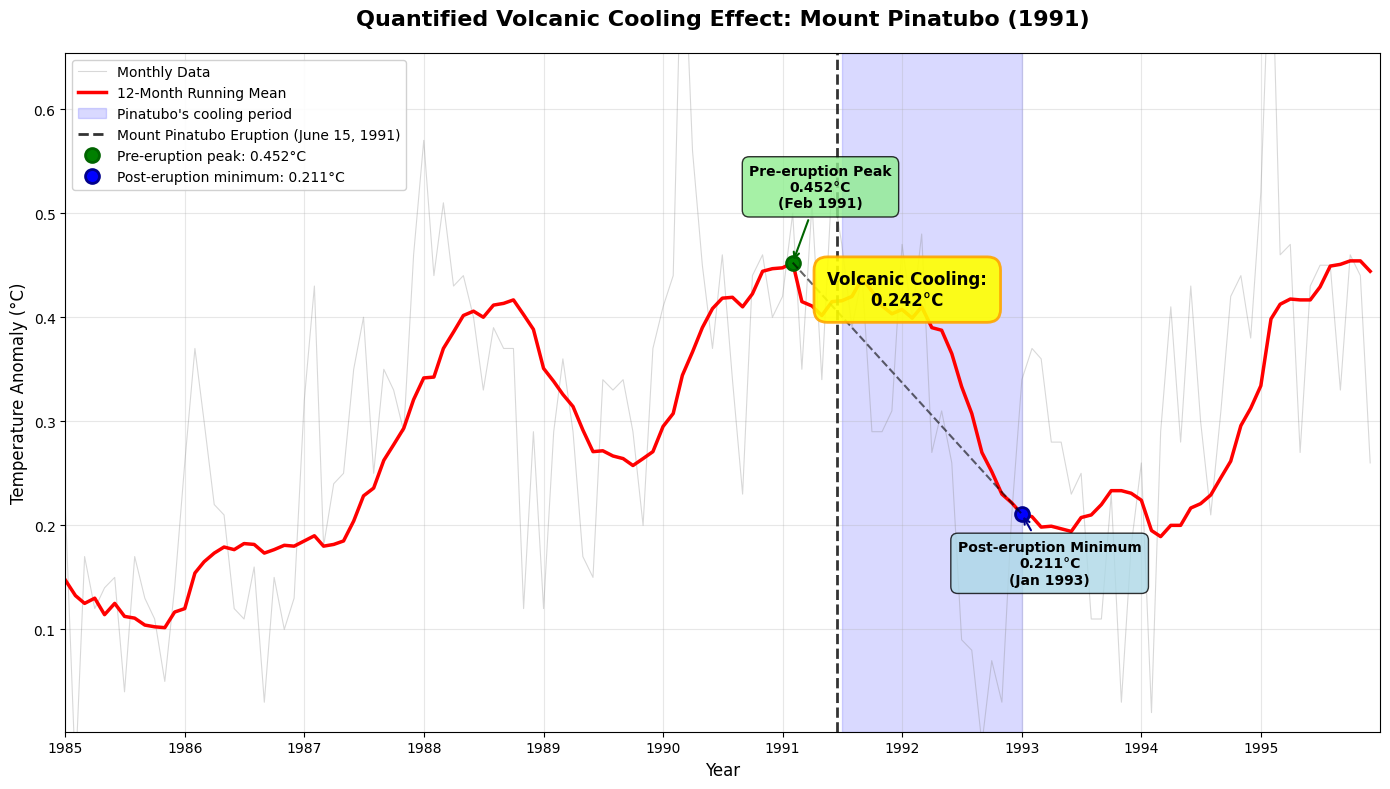

In [ ]:
import numpy as np

# Define key dates for analysis
pinatubo_eruption = pd.to_datetime('1991-06-15')
pre_eruption_period_start = pd.to_datetime('1990-01-01')
pre_eruption_period_end = pd.to_datetime('1991-05-31')
post_eruption_period_start = pd.to_datetime('1991-07-01')
post_eruption_period_end = pd.to_datetime('1993')

# Extract 12-month running mean data for analysis
running_mean_data = df_melted_sorted['RunningMean12'].dropna()

# Find pre-eruption peak and post-eruption minimum
pre_eruption_data = running_mean_data.loc[pre_eruption_period_start:pre_eruption_period_end]
pre_eruption_peak_temp = pre_eruption_data.max()
pre_eruption_peak_date = pre_eruption_data.idxmax()

post_eruption_data = running_mean_data.loc[post_eruption_period_start:post_eruption_period_end]
post_eruption_min_temp = post_eruption_data.min()
post_eruption_min_date = post_eruption_data.idxmin()

# Calculate cooling magnitude
cooling_magnitude = pre_eruption_peak_temp - post_eruption_min_temp

# Create visualization
plt.figure(figsize=(14, 8))

start_date, end_date = '1985-01-01', '1995-12-31'
raw_data = df_melted_sorted['Temperature'].loc[start_date:end_date]
smooth_data = df_melted_sorted['RunningMean12'].loc[start_date:end_date]

# Plot data
plt.plot(raw_data.index, raw_data.values, color='gray', alpha=0.3, label='Monthly Data', linewidth=0.8)
plt.plot(smooth_data.index, smooth_data.values, color='red', linewidth=2.5, label='12-Month Running Mean')

# Add shaded cooling period and eruption line
plt.axvspan(pd.to_datetime('1991-07-01'), pd.to_datetime('1993'), alpha=0.15, color='blue', label="Pinatubo's cooling period")
plt.axvline(x=pinatubo_eruption, color='black', linestyle='--', linewidth=2, alpha=0.8, label='Mount Pinatubo Eruption (June 15, 1991)')

# Mark key points
plt.plot(pre_eruption_peak_date, pre_eruption_peak_temp, 'go', markersize=10, markeredgecolor='darkgreen',
         markeredgewidth=2, label=f'Pre-eruption peak: {pre_eruption_peak_temp:.3f}°C')
plt.plot(post_eruption_min_date, post_eruption_min_temp, 'bo', markersize=10, markeredgecolor='darkblue',
         markeredgewidth=2, label=f'Post-eruption minimum: {post_eruption_min_temp:.3f}°C')

# Add annotations
plt.annotate(f'Pre-eruption Peak\n{pre_eruption_peak_temp:.3f}°C\n({pre_eruption_peak_date.strftime("%b %Y")})',
            xy=(pre_eruption_peak_date, pre_eruption_peak_temp), xytext=(20, 40), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5),
            fontsize=10, ha='center', weight='bold')

plt.annotate(f'Post-eruption Minimum\n{post_eruption_min_temp:.3f}°C\n({post_eruption_min_date.strftime("%b %Y")})',
            xy=(post_eruption_min_date, post_eruption_min_temp), xytext=(20, -50), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8),
            arrowprops=dict(arrowstyle='->', color='darkblue', lw=1.5),
            fontsize=10, ha='center', weight='bold')

# Add cooling magnitude annotation
mid_date = pre_eruption_peak_date + (post_eruption_min_date - pre_eruption_peak_date) / 2
mid_temp = (pre_eruption_peak_temp + post_eruption_min_temp) / 2
plt.annotate(f'Volcanic Cooling:\n{cooling_magnitude:.3f}°C',
            xy=(mid_date, mid_temp), xytext=(0, 60), textcoords='offset points',
            fontsize=12, ha='center', weight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow', alpha=0.9, edgecolor='orange', linewidth=2))

# Add connecting line
plt.plot([pre_eruption_peak_date, post_eruption_min_date], [pre_eruption_peak_temp, post_eruption_min_temp],
         'k--', alpha=0.6, linewidth=1.5)

# Formatting
plt.title('Quantified Volcanic Cooling Effect: Mount Pinatubo (1991)', fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', framealpha=0.9)
plt.xlim(pd.to_datetime('1985-01-01'), pd.to_datetime('1995-12-31'))
plt.ylim(smooth_data.min() - 0.1, smooth_data.max() + 0.2)
plt.tight_layout()
plt.show()

# Questions for Reflection:

1.Looking at the 12-month smoothed global temperatures, how pronounced is the Pinatubo cooling compared to the year-to-year variability? Is it clearly the biggest dip in that period?

- Pinatubo's global cooling effect is quite **heavily pronounced** between **1992-1995**
- Instead of having an immediate post-eruption effect, the dip can be seen in the following few years.

2.How long did it take for global temperatures to recover to the pre-eruption level?

- Since Pinatubo's eruption in 1991, global temperatures dipped until their recovery around **1995**

3.What other factors were at play in the early 1990s that could confound the signal?

- Pinatubo's cooling effect should've been much more pronounced; however, the eruption took place during a **solar maximum** and **El Niño**, both of which **increased global temperatures**.

4.Discuss the physical mechanism: Why do volcanic aerosols cause cooling? Use the data to infer – e.g., the aerosols from Pinatubo increased stratospheric AOD ~10x, reflecting sunlight. How does the data support this mechanism?

- Sulfuric gases released during volcanic eruptions convert into aerosol particles, which **linger** for a few years in the **stratosphere**
- These particles **scatter and reflect** incoming **sunlight**
- When spread around by wind, **global cooling** is occurs

5.Compare Pinatubo’s impact to that of El Niño (from Assignment 5): El Niño 1998 warmed ~0.2–0.3°C above trend, Pinatubo cooled ~0.3°C below trend. Which effect was larger or lasted longer? What does this tell us about the climate system’s sensitivity to these forcings?

- Pinatubo's and El Niño's global temperature impacts are **similar** in opposite ends, although El Niño's effect didn't seem to last as long
- These effects tell us that Earth has **natural global temperature regulators**; however, they are nothing compared to the global warming caused by human impact

6.Consider if any other big volcanoes appear in the record: 1883 Krakatoa (if you had data that far back, a drop is observed then), 1982 El Chichón (small dip, masked by El Niño). Why is Pinatubo so useful for study?

- Pinatubo was well observed with **satellites** and occurred in a period with **good data coverage** and a relatively **clean signal** in a **warming period**

7.Finally, reflect on the relevance to geoengineering: Sometimes proposals suggest injecting aerosols to cool climate (mimicking volcanoes). Based on Pinatubo data, how effective was a single eruption in cooling the Earth and for how long? What does the data imply about the potential and risks (Pinatubo also caused observable reductions in precipitation and ozone changes)? This is more of a discussion prompt – your data shows the cooling, you can extrapolate implications.

- Pinatubo's eruption was very effective in cooling the Earth, but due to our heavy CFC use during that period, the ozone layer was being destroyed.
- Without CFCs, the ozone layer would be much less impacted
- Change in precipitation patterns could disrupt life in different regions; we would need international cooperation and assess further risks
